<a href="https://colab.research.google.com/github/MuhammadArifRizkiPohan/ComputerVisionScratch/blob/main/Improvment_from_model_scratch_for_image_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Menetapkan token API Kaggle untuk otentikasi. Ini diperlukan untuk mengunduh dataset dari Kaggle.

In [2]:
import kagglehub

# Mengunduh versi terbaru dari dataset 'apples-or-tomatoes-image-classification' dari Kaggle Hub.
path = kagglehub.dataset_download("samuelcortinhas/apples-or-tomatoes-image-classification")

print("Path to dataset files:", path)

100%|██████████| 2.33M/2.33M [00:00<00:00, 130MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/samuelcortinhas/apples-or-tomatoes-image-classification/versions/1


In [3]:
import shutil

# Mendefinisikan jalur sumber (lokasi dataset di cache Kaggle) dan jalur tujuan (di Google Colab).
src = "/root/.cache/kagglehub/datasets/samuelcortinhas/apples-or-tomatoes-image-classification/versions/1"
dst = "/content/sample_data/apples_tomatoes"

# Menyalin seluruh struktur direktori dataset dari sumber ke tujuan.
# argumen dirs_exist_ok=True memungkinkan penyalinan meskipun direktori tujuan sudah ada.
shutil.copytree(src, dst, dirs_exist_ok=True)

'/content/sample_data/apples_tomatoes'

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np
from glob import glob # Digunakan untuk menemukan jalur file/direktori yang cocok dengan pola tertentu.
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, MaxPooling2D

In [5]:
# Menggunakan fungsi glob untuk mendapatkan daftar semua sub-direktori dalam folder 'train'.
# Setiap sub-direktori diasumsikan mewakili satu kelas (misalnya, 'apples', 'tomatoes').
folders = glob('/content/sample_data/apples_tomatoes/train/*')
# Menampilkan daftar folder yang ditemukan.
folders

['/content/sample_data/apples_tomatoes/train/tomatoes',
 '/content/sample_data/apples_tomatoes/train/apples']

In [6]:
# Menghitung jumlah kelas yang berbeda berdasarkan jumlah folder yang ditemukan.
num_of_classes = len(folders)
# Menampilkan jumlah kelas.
num_of_classes

2

In [7]:
model = Sequential()

# Lapisan Konvolusi pertama: 32 filter, kernel 3x3, padding 'valid', aktivasi ReLU.
# input_shape=(256,256,3) mendefinisikan dimensi input gambar (tinggi, lebar, saluran warna).
model.add(Conv2D(32, kernel_size=(3,3), padding = 'valid', activation= 'relu', input_shape = (256,256,3)))

# Lapisan MaxPooling pertama: ukuran pool 2x2, stride 2, padding 'valid'.
# Digunakan untuk mengurangi dimensi spasial dan mengekstraksi fitur dominan.
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

# Lapisan Konvolusi kedua: 64 filter, kernel 3x3, padding 'valid', aktivasi ReLU.
model.add(Conv2D(64, kernel_size=(3,3), padding = 'valid', activation='relu'))

# Lapisan MaxPooling kedua.
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

# Lapisan Konvolusi ketiga: 128 filter, kernel 3x3, padding 'valid', aktivasi ReLU.
model.add(Conv2D(128, kernel_size=(3,3), padding = 'valid', activation='relu'))

# Lapisan MaxPooling ketiga.
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

# Lapisan Flatten: Meratakan output dari lapisan konvolusi/pooling menjadi vektor 1D.
# Ini penting sebelum meneruskan data ke lapisan Dense (fully connected).
model.add(Flatten())

# Lapisan Dense (Fully Connected) pertama: 128 neuron, aktivasi ReLU.
model.add(Dense(128, activation='relu'))

# Lapisan Dense kedua: 64 neuron, aktivasi ReLU.
model.add(Dense(64, activation='relu'))

# Lapisan Dense terakhir: 1 neuron, aktivasi Sigmoid.
# Digunakan untuk klasifikasi biner, menghasilkan probabilitas kelas positif.
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Menyimpan model yang telah dilatih ke dalam file 'model.h5'.
# Ini memungkinkan model untuk dimuat ulang dan digunakan nanti tanpa perlu melatihnya kembali.
model.save('model.h5')

In [8]:
# Menampilkan ringkasan arsitektur model, termasuk jenis lapisan, bentuk output, dan jumlah parameter (bobot) yang dapat dilatih.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Mengompilasi model.
# 'loss' diatur ke 'binary_crossentropy' karena ini adalah masalah klasifikasi biner (apel atau tomat).
# 'optimizer' menggunakan 'adam', algoritma optimasi yang populer.
# 'metrics' diatur ke 'accuracy' untuk memantau kinerja model selama pelatihan.
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [10]:
# Mengimpor ImageDataGenerator dari tensorflow.keras.preprocessing.image.
# Kelas ini digunakan untuk augmentasi data dan pra-pemrosesan gambar.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
from IPython.utils.path import shellglob
# Inisialisasi ImageDataGenerator untuk data latih.
# rescale=1./256: Normalisasi nilai piksel dari [0, 255] ke [0, 1].
# shear_range=0.2: Menerapkan transformasi shearing acak.
# zoom_range=0.2: Menerapkan zoom acak pada gambar.
# horizontal_flip=True: Membalik gambar secara horizontal secara acak.
train_datagen = ImageDataGenerator(rescale = 1./256,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Inisialisasi ImageDataGenerator untuk data uji.
# Hanya melakukan penskalaan ulang (normalisasi) karena data uji tidak boleh diaugmentasi untuk menghindari bias.
test_datagen = ImageDataGenerator(rescale = 1./256)

In [12]:
# Membuat generator data untuk data uji dari direktori '/content/sample_data/apples_tomatoes/test'.
# target_size=(256, 256): Semua gambar akan diubah ukurannya menjadi 256x256 piksel.
# batch_size=32: Data akan disalurkan ke model dalam batch berisi 32 gambar.
# class_mode='binary': Karena ini adalah masalah klasifikasi biner (apel atau tomat), label akan 0 atau 1.
test_set = test_datagen.flow_from_directory('/content/sample_data/apples_tomatoes/test',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode ='binary')

Found 97 images belonging to 2 classes.


In [13]:
# Membuat generator data untuk data latih dari direktori '/content/sample_data/apples_tomatoes/train'.
# target_size=(256, 256): Semua gambar akan diubah ukurannya menjadi 256x256 piksel.
# batch_size=32: Data akan disalurkan ke model dalam batch berisi 32 gambar.
# class_mode='binary': Karena ini adalah masalah klasifikasi biner (apel atau tomat), label akan 0 atau 1.
train_set = train_datagen.flow_from_directory('/content/sample_data/apples_tomatoes/train',
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode ='binary')

# Melatih model menggunakan data dari generator train_set dan memvalidasinya dengan test_set.
# epochs=20: Model akan dilatih selama 20 siklus penuh melalui seluruh dataset.
# steps_per_epoch=len(train_set): Jumlah langkah (batch) yang akan diambil dari generator pelatihan di setiap epoch.
# validation_steps=len(test_set): Jumlah langkah (batch) yang akan diambil dari generator validasi di setiap epoch.
history = model.fit(
  train_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set)
)

Found 294 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 779ms/step - accuracy: 0.4519 - loss: 1.5078

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.4541 - loss: 1.4712 - val_accuracy: 0.5567 - val_loss: 0.6790
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 473ms/step - accuracy: 0.5486 - loss: 0.6784 - val_accuracy: 0.5670 - val_loss: 0.6595
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 504ms/step - accuracy: 0.6023 - loss: 0.6563 - val_accuracy: 0.5567 - val_loss: 0.6738
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 522ms/step - accuracy: 0.5561 - loss: 0.6884 - val_accuracy: 0.5979 - val_loss: 0.6481
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 470ms/step - accuracy: 0.6188 - loss: 0.6413 - val_accuracy: 0.7216 - val_loss: 0.6350
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 587ms/step - accuracy: 0.7113 - loss: 0.6034 - val_accuracy: 0.6598 - val_loss: 0.6663
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 582ms/step - accuracy: 0.7243 - loss: 0.5763 - val_accuracy: 0.7010 - val_loss: 0.5646
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 562ms/step - accuracy: 0.7101 - loss: 0.5471 - val_accuracy: 0.6701 - val_l

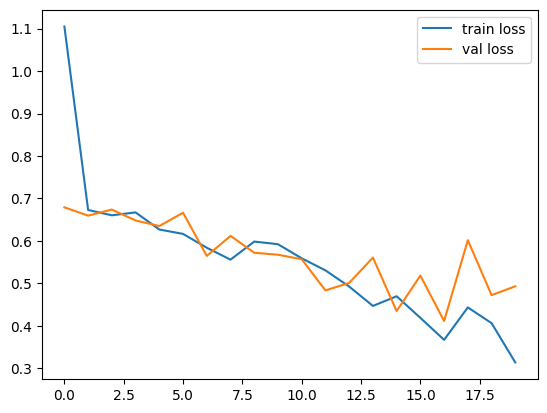

<Figure size 640x480 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
# Memplot nilai 'loss' (kerugian) selama fase pelatihan dan validasi.
# Garis biru menunjukkan kerugian pelatihan, garis oranye menunjukkan kerugian validasi.
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend() # Menampilkan legenda untuk membedakan 'train loss' dan 'val loss'.
plt.show()   # Menampilkan plot di layar.
plt.savefig('LossVal_loss') # Menyimpan plot ke file bernama 'LossVal_loss.png'.

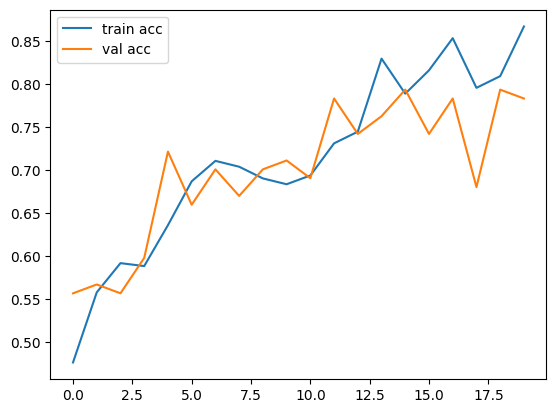

<Figure size 640x480 with 0 Axes>

In [15]:
# Memplot nilai 'accuracy' (akurasi) selama fase pelatihan dan validasi.
# Garis biru menunjukkan akurasi pelatihan, garis oranye menunjukkan akurasi validasi.
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend() # Menampilkan legenda untuk membedakan 'train acc' dan 'val acc'.
plt.show()   # Menampilkan plot di layar.
plt.savefig('AccVal_acc') # Menyimpan plot ke file bernama 'AccVal_acc.png'.

In [16]:
# Mengevaluasi kinerja model pada dataset uji yang belum pernah dilihat sebelumnya.
# Fungsi ini mengembalikan nilai kerugian (loss) dan metrik akurasi pada data uji.
model.evaluate(test_set)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7853 - loss: 0.4979


[0.4930696487426758, 0.7835051417350769]

In [17]:
# Mengimpor fungsi load_model dari tensorflow.keras.models.
# Fungsi ini digunakan untuk memuat model yang telah disimpan sebelumnya dari disk.
from tensorflow.keras.models import load_model

In [25]:
# Menyimpan model yang telah dilatih ke dalam file 'model.h5'.
# Ini memungkinkan model untuk dimuat ulang dan digunakan nanti tanpa perlu melatihnya kembali.
model.save('model.h5')

In [21]:
# Memuat model yang telah disimpan dari file 'model.h5'.
# Ini memungkinkan penggunaan model tanpa harus melatihnya ulang.
model = load_model("model.h5")

In [22]:
# Mengimpor modul image dari tensorflow.keras.preprocessing.
# Modul ini menyediakan fungsi untuk memuat, memproses, dan mengaugmentasi gambar.
from tensorflow.keras.preprocessing import image

In [32]:
# Memuat gambar dari jalur '/content/applee1.jpeg' dan mengubah ukurannya menjadi (256, 256).
# Ukuran ini harus sesuai dengan dimensi input yang diharapkan oleh model (saat pelatihan).
img=image.load_img('/content/sample_data/apples_tomatoes/test/tomatoes/img_p1_107.jpeg',target_size=(256,256))

In [33]:
import numpy as np
# Mengubah gambar yang dimuat menjadi array NumPy.
x=image.img_to_array(img)
# Normalisasi nilai piksel gambar dari rentang [0, 255] menjadi [0, 1].
x=x/255

# Menambahkan dimensi batch ke array gambar. Model Keras mengharapkan input dalam bentuk (jumlah_sampel, tinggi, lebar, saluran_warna).
x=np.expand_dims(x,axis=0)
# Melakukan prediksi menggunakan model pada gambar yang telah diproses.
output = model.predict(x)
# Menampilkan hasil prediksi (probabilitas kelas).
print(output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[0.98756635]]


In [34]:
# Menampilkan bentuk (shape) dari array gambar 'x'.
# Ini menunjukkan dimensi batch, tinggi, lebar, dan saluran warna dari gambar yang siap diproses model.
x.shape

(1, 256, 256, 3)

In [35]:
# Mengakses elemen pertama dari array hasil prediksi (output).
# Karena ini adalah klasifikasi biner dengan lapisan output sigmoid tunggal, hasilnya adalah probabilitas tunggal.
output[0][0]

np.float32(0.98756635)

In [36]:
# Menentukan kelas prediksi berdasarkan nilai probabilitas yang dihasilkan model.
# Jika probabilitas lebih besar atau sama dengan 0.5, gambar diklasifikasikan sebagai 'Apples'.
# Jika tidak, gambar diklasifikasikan sebagai 'Tomato'.
if output[0][0] >=0.5:
    prediction = 'Apples'
    print(prediction)
else:
    prediction = 'Tomato'
    print(prediction)

Apples
